In [ ]:
from google.colab import files
files.upload()  # Choose your kaggle.json file when the window pops up

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p "/content/drive/MyDrive/PlantVillage"
!kaggle datasets download -d emmarex/plantdisease -p "/content/drive/MyDrive/PlantVillage"
!unzip "/content/drive/MyDrive/PlantVillage/plantdisease.zip" -d "/content/drive/MyDrive/PlantVillage"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: /content/drive/MyDrive/PlantVillage/plantvillage/Plant

In [6]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os

In [7]:
#datset paths
train_dir = "/content/drive/MyDrive/PlantVillage/PlantVillage"

print("✅ Dataset path set to:", train_dir)
print("📁 Classes:", os.listdir(train_dir))


✅ Dataset path set to: /content/drive/MyDrive/PlantVillage/PlantVillage
📁 Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [8]:
#PreProcess
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    shuffle=True
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


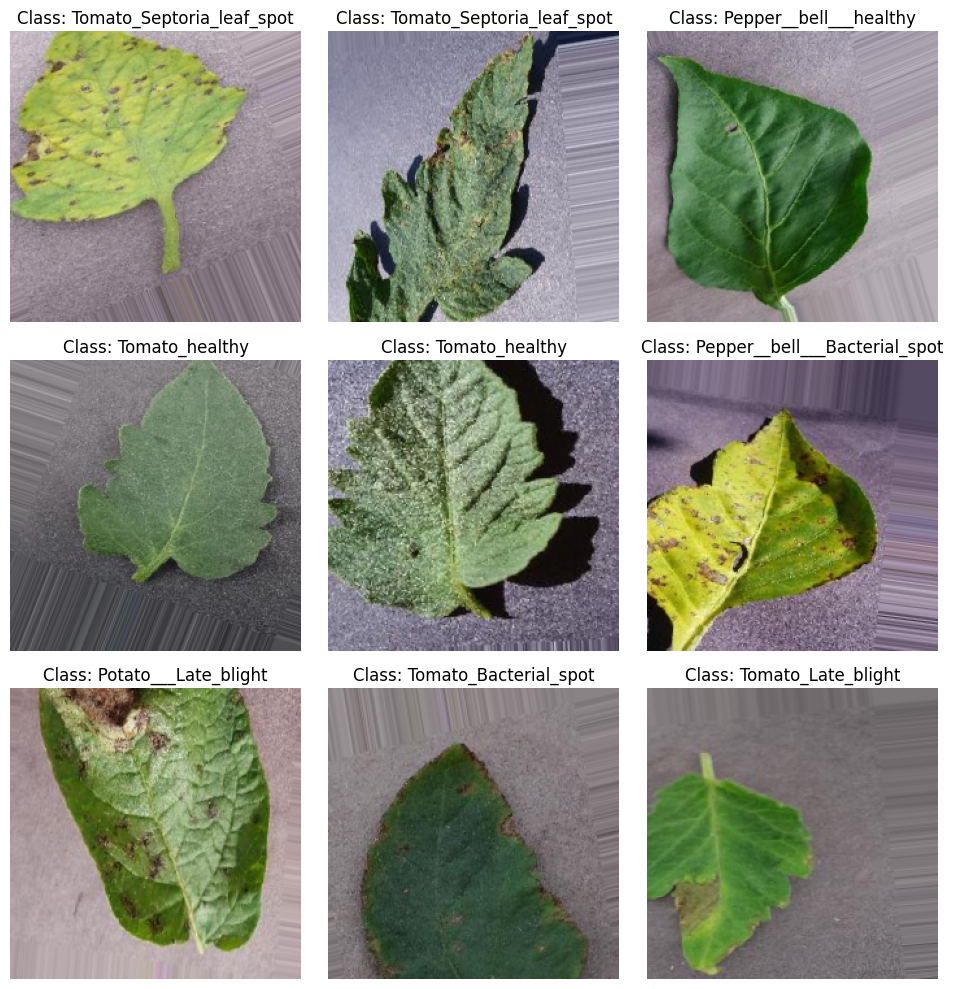

In [10]:
#Checking the training images randomly
import numpy as np
import matplotlib.pyplot as plt

# Get one batch of training images
images, labels = next(train_generator)

# Plot first 9 images from that batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Class: {list(train_generator.class_indices.keys())[np.argmax(labels[i])]}")
    plt.tight_layout()
plt.show()


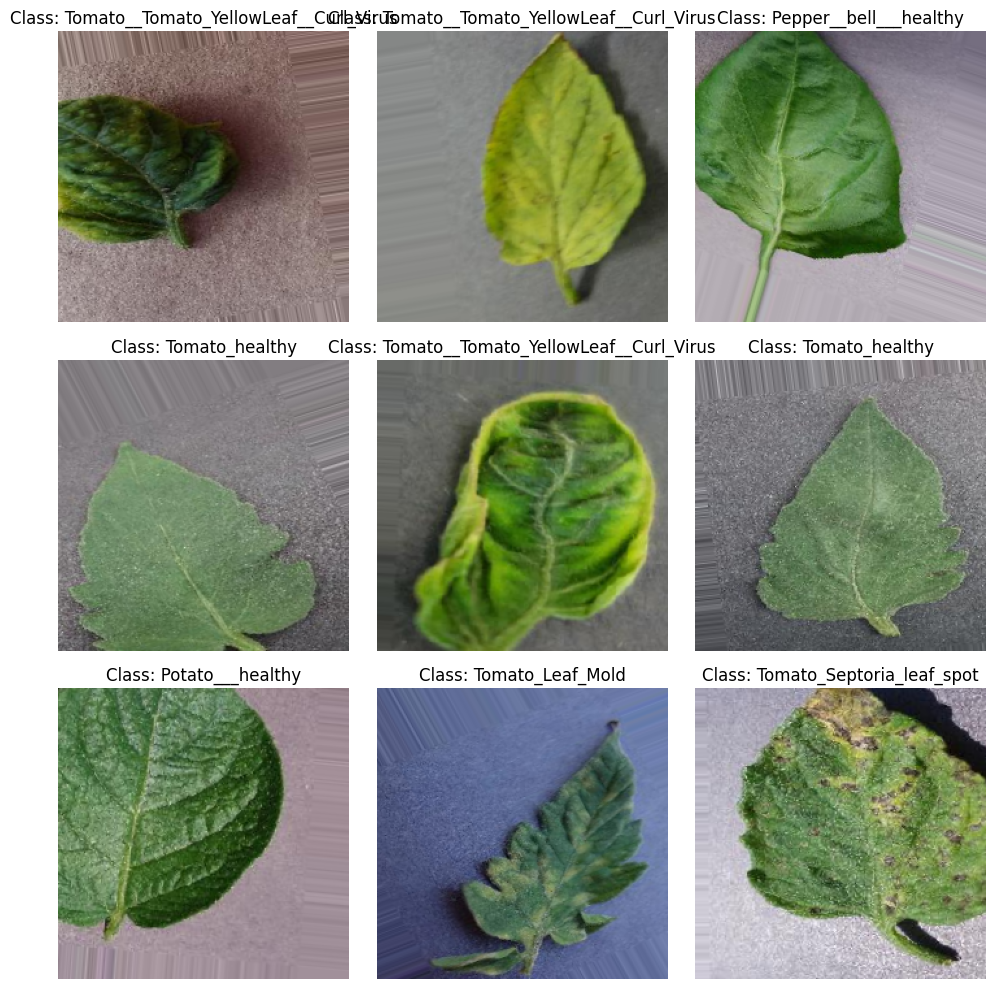

In [11]:
#Validation dataset
images, labels = next(val_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Class: {list(val_generator.class_indices.keys())[np.argmax(labels[i])]}")
    plt.tight_layout()
plt.show()


In [12]:
#Building the model using MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
#Training the model
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=10,
    verbose=1
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 797s 2s/step - accuracy: 0.8196 - loss: 0.5233 - val_accuracy: 0.8411 - val_loss: 0.4547
Epoch 2/10
  1/516 ━━━━━━━━━━━━━━━━━━━━ 9:11 1s/step - accuracy: 0.9062 - loss: 0.4505

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 207s 400ms/step - accuracy: 0.9062 - loss: 0.4505 - val_accuracy: 0.8455 - val_loss: 0.4389
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.8390 - loss: 0.4832 - val_accuracy: 0.8625 - val_loss: 0.3842
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 148s 286ms/step - accuracy: 0.8125 - loss: 0.4018 - val_accuracy: 0.8774 - val_loss: 0.3613
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.8459 - loss: 0.4450 - val_accuracy: 0.8853 - val_loss: 0.3432
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 148s 286ms/step - accuracy: 0.8125 - loss: 0.4857 - val_accuracy: 0.8828 - val_loss: 0.3334
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 799s 1s/step - accuracy: 0.8567 - loss: 0.4261 - val_accuracy: 0.8818 - val_loss: 0.3354
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 145s 278ms/step - accuracy: 0.9375 - loss: 0.2434 - val_accuracy: 0.8767 - val_loss: 0.3381
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.8656 - loss: 0.3989 - val_acc

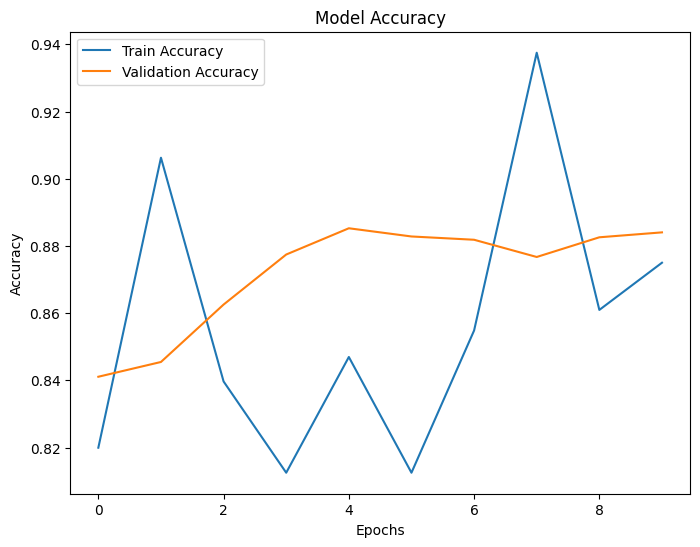

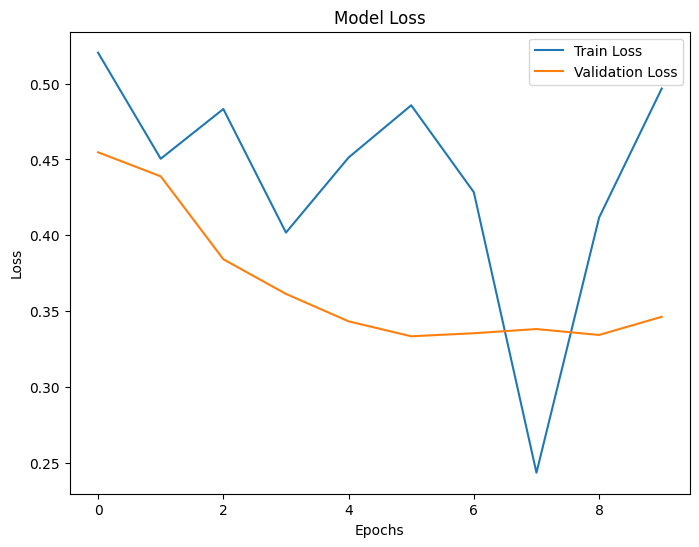

In [15]:
#Plot Accuracy and Loss Graphs
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
#Model EValuation
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8770 - loss: 0.3489
✅ Validation Accuracy: 87.99%


In [17]:
#Saving Model
save_path = "/content/drive/MyDrive/PlantVillage/Plant_Disease_Detector_MobileNetV2.h5"
model.save(save_path)
print("💾 Model saved successfully at:", save_path)

💾 Model saved successfully at: /content/drive/MyDrive/PlantVillage/Plant_Disease_Detector_MobileNetV2.h5
